<a href="https://colab.research.google.com/github/dhanashrihogale23/dhanashri_23-Oasisinfobyte_project/blob/main/Email_spam_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.size

27860

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# drop last three column(Unnamed:2,Unnamed:3,Unnamed:4) because these columns contain 50,12,6 non-null value of 5572.

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(4)

,v1,v2
1810,ham,"Now, whats your house # again ? And do you hav..."
3100,ham,Pathaya enketa maraikara pa'
1363,ham,"Yetunde, i'm sorry but moji and i seem too bus..."
757,ham,"Faith makes things possible,Hope makes things ..."


In [ ]:
# renaming the col
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [ ]:
df.sample(4)

,Target,Text
1872,ham,Oh ok i didnt know what you meant. Yep i am ba...
880,spam,Reminder: You have not downloaded the content ...
705,ham,I don't think I can get away for a trek that l...
330,ham,K.k:)apo k.good movie.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Target']=encoder.fit_transform(df['Target'])

In [ ]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [ ]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
#checking duplicated values
df.duplicated().sum()

403

In [ ]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

**EDA**

In [ ]:
df.head(6)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

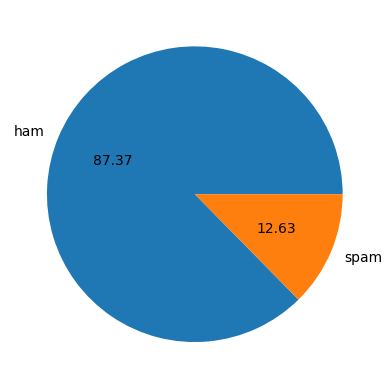

In [ ]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#see how to col.no.of characters in sms/email
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [ ]:
# then I store no.of character in new variable/col..
df['num_characters']=df['Text'].apply(len)

In [ ]:
df.head(4)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [ ]:
#now fetch no.of words
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [ ]:
#now I will col.length of each list
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [ ]:
#store no.of words in new variable/col.num_words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head(4)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [ ]:
# now fetch no.of sentences in single sms/mail
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [ ]:
# now col.len of each sentences
df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [ ]:
# store no.of sentence in new variable/col.num_sentences
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


analyze ham and spam separetely

In [ ]:
#ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

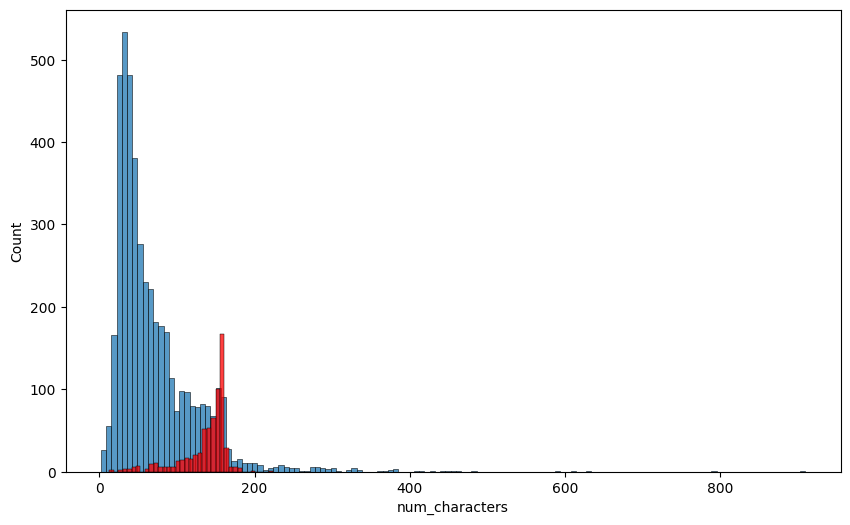

In [ ]:
# plot histogram of ham and spam sms/email
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

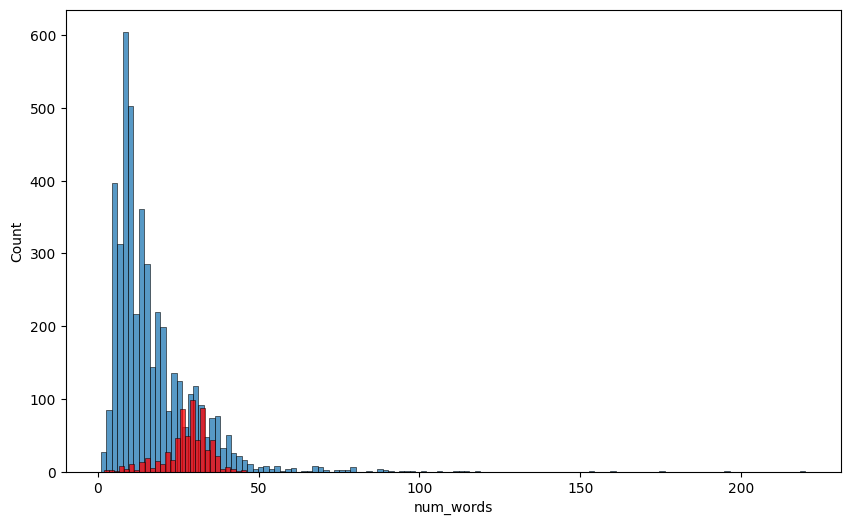

In [ ]:
# plot histogram of ham and spam sms/email
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')


<Axes: xlabel='num_sentences', ylabel='Count'>

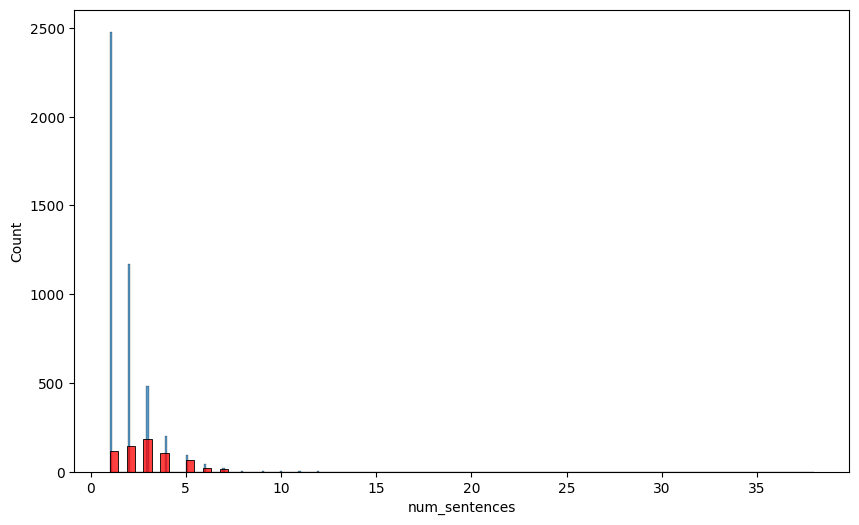

In [ ]:
# plot histogram of ham and spam sms/email
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')


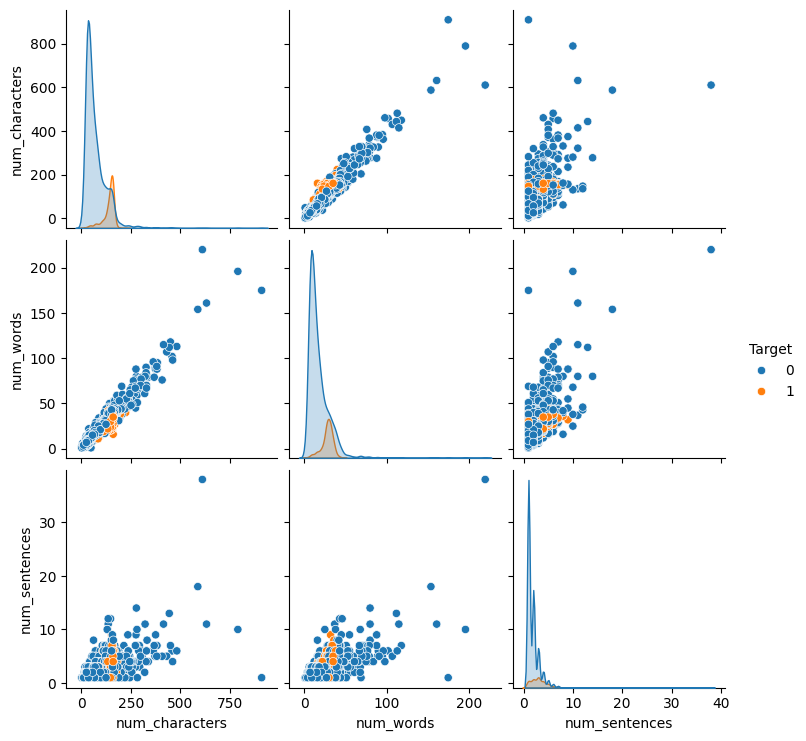

In [ ]:
sns.pairplot(df,hue='Target')

In [ ]:
df.corr()

<ipython-input-44-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-45-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

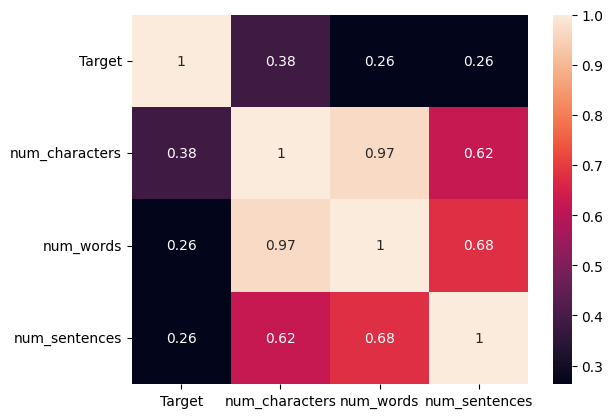

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Data/Text Preprocessing**

i)Lower ii)Tokenization iii)Removing special character iv)removing stop words and punctuation v)stemming

In [ ]:
# I create a function which perform all the above five steps of text processing
# i)Lower

def transform_text1(text1):
    text1 = text1.lower()
    return text1

In [ ]:
transform_text1('HI how Are You')

'hi how are you'

In [ ]:
# ii)Tokenization
def transform_text2(text2):
    text2 = nltk.word_tokenize(text2)
    return text2

In [ ]:
transform_text2('HI how Are You')

['HI', 'how', 'Are', 'You']

In [ ]:
# iii)Removing Special Character
def transform_text3(text3):
    y=[]
    for i in text3:
        if i.isalnum():
           y.append(i)
    return y


In [ ]:
transform_text3('HI how Are % @ 20 45* You')

['H', 'I', 'h', 'o', 'w', 'A', 'r', 'e', '2', '0', '4', '5', 'Y', 'o', 'u']

In [ ]:
def transform_text3a(text3a):
    text3a = text3a.lower()
    text3a = nltk.word_tokenize(text3a)
    y_a=[]
    for i in text3a:
        if i.isalnum():
           y_a.append(i)
    return y_a



In [ ]:
transform_text3a('HI how Are % @ 20 45* You')

['hi', 'how', 'are', '20', '45', 'you']

In [ ]:
# iv)Removing stop words and punctuation
# v) stemming

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text4(text4):
    text4 = text4.lower()
    text4 = nltk.word_tokenize(text4)
    y_4=[]
    for i in text4:
        if i.isalnum():
           y_4.append(i)
    text4 = y_4[:]
    y_4.clear()
    for i in text4:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y_4.append(i)
    return  y_4

In [ ]:
transform_text4('HI how Are % @ 20 45* You Mrinal?')


['hi', '20', '45', 'mrinal']

In [ ]:
# v)stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
def transform_text5(text5):
    text5 = text5.lower()
    text5 = nltk.word_tokenize(text5)
    y_5=[]
    for i in text5:
        if i.isalnum():
           y_5.append(i)
    text5 = y_5[:]
    y_5.clear()
    for i in text5:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y_5.append(i)
    text5 = y_5[:]
    y_5.clear()
    for i in text5:
        y_5.append(ps.stem(i))
    return " ".join(y_5)

In [ ]:
transform_text5('I loved the VT lectures of Machine Learning.How about you?')

'love vt lectur machin'

In [ ]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [ ]:
transform_text5('I sent you &lt;#&gt; bucks')

'sent lt gt buck'

In [ ]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [ ]:
transform_text5('But i ll b going 2 sch on mon. My sis need 2 take smth.')

'b go 2 sch mon si need 2 take smth'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
           y.append(i)
    text= y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
# def transform_text(text):
  #  text = text.lower()
 #   tokens = nltk.word_tokenize(text)
  #  filtered_tokens = [token for token in tokens if token.isalnum()]
    #return filtered_tokens



df['Text'].apply(transform_text)


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [ ]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [ ]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [ ]:
#word cloud--> show/display important word in big size
#now I create wordcloud of spam message
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from PIL import Image,ImageDraw, ImageFont
wc = WordCloud(width=800,height=100,min_font_size=10,background_color='white')

In [ ]:
df['Target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Target, Length: 5169, dtype: bool

In [ ]:
df[df['Target']==1]

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [ ]:
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Text, Length: 653, dtype: object

In [ ]:
df['Transformed_Text'] = df['Transformed_Text'].astype(str)
df[df['Target']==1]['Transformed_Text'].str.cat(sep="")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcvwinner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hourmobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 infourgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18xxxmobilemovieclub use credit click wap link next txt messag click httpengland v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wqthank subscript rington uk mobil charg pleas confirm repli ye repli charg07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrowsm ac sptv new jersey devil detroit red wing play i

In [ ]:
wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=""))

In [ ]:
#from wordcloud import WordCloud

# Create a WordCloud object
#spam = WordCloud()

spam_wc = wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=""))

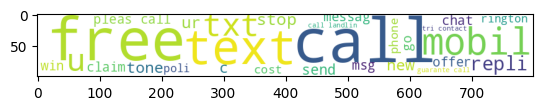

In [ ]:
plt.imshow(spam_wc)

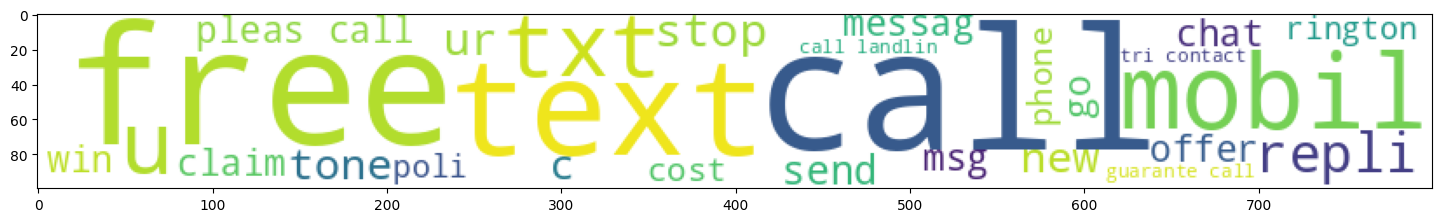

In [ ]:
plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=""))



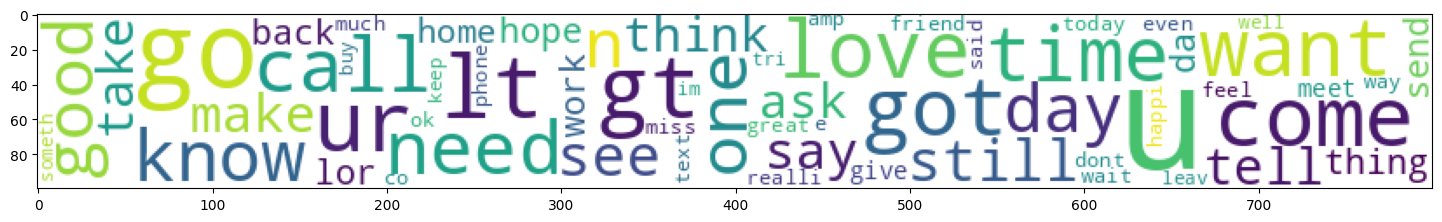

In [ ]:
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

Now let's see Top 30 words in spam and ham

In [ ]:
df.head(5)

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#top 30 words in spam(Target=1)
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Text, Length: 653, dtype: object

In [ ]:
df[df['Target']==1]['Transformed_Text'].tolist() #tolist() convert seies into list


['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [ ]:
for msg in df[df['Target']==1]['Transformed_Text'].tolist(): #tolist() convert seies into list
    print(msg.split())

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [ ]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Text'].tolist(): #tolist() convert seies into list
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [ ]:
# put most common words in dataframe
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


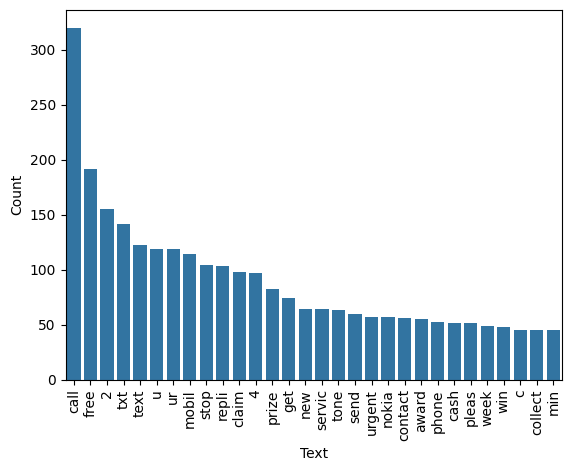

In [ ]:
from collections import Counter
# Assuming spam_corpus is your data
spam_counter = Counter(spam_corpus)
most_common_30 = spam_counter.most_common(30)
df = pd.DataFrame(most_common_30, columns=['Text', 'Count'])

sns.barplot(x='Text', y='Count', data=df)
plt.xticks(rotation='vertical')
plt.show()
